# Analysis/Predictive Modelling of Customer Churn at a Telecom Company

### Data Source: IBM Sample Data: Telco Customer Churn Dataset.
#### From: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

In [2]:
data = pd.read_csv("Telco_Churn.csv")

display(data.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning:

In [3]:
display(data.customerID.count())
display(data.customerID.nunique())

#All customer IDs are unique, therefore, we no longer need this column for analysis purposes.
data = data.drop(columns = ['customerID'])
display(data.head())

7043

7043

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Check for null values: none found.
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#These rows are causing problems by preventing TotalCharges from being converted to a numeric data type.
data[data.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
#Customers who have been with the company for less than one full month should be excluded because there is no possible way
#for them to have churned (churned being defined as having left within the last month). This also solves the problem
#with TotalCharges identified above.

display(data[data.tenure == 0].shape[0])

data = data.drop(data[data.tenure == 0].index).reset_index(drop = True)

display(data[data.tenure == 0].shape[0])

11

0

In [7]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
data['PaymentMethod'] = data['PaymentMethod'].replace({'Bank transfer (automatic)': 'Bank transfer', 'Credit card (automatic)': 'Credit card'})

data = data.rename(columns= {'gender': 'Gender', 'tenure': 'Tenure'})

## Data Exploration:

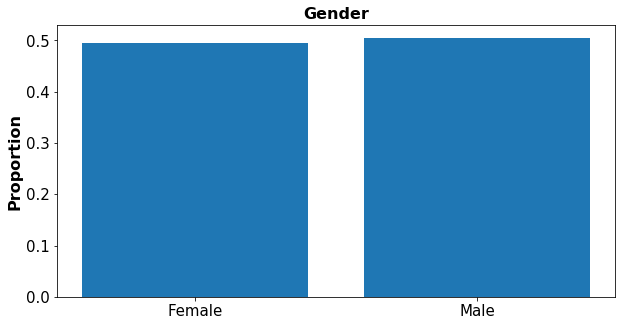

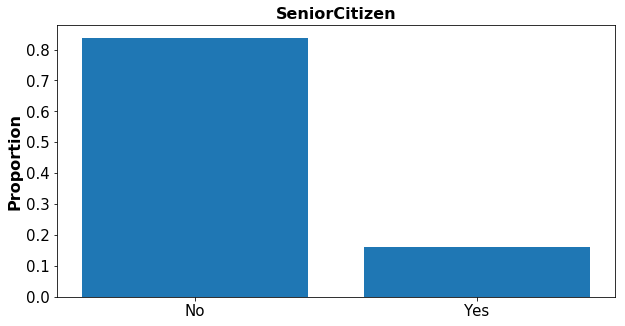

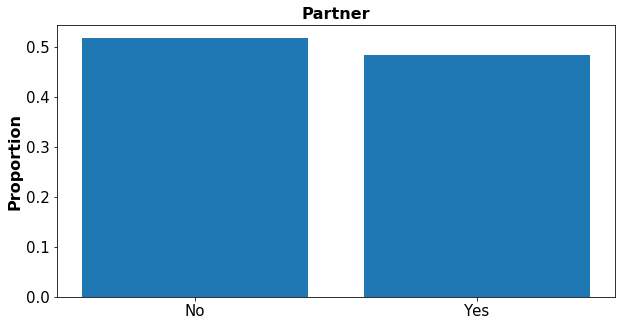

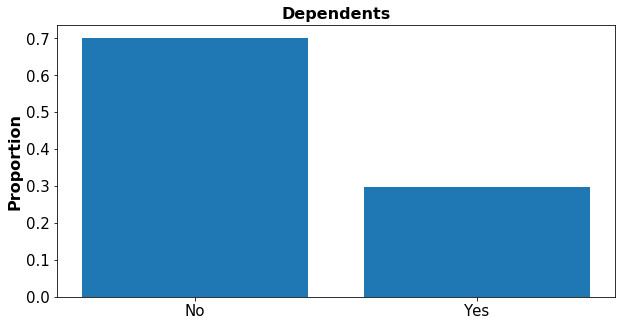

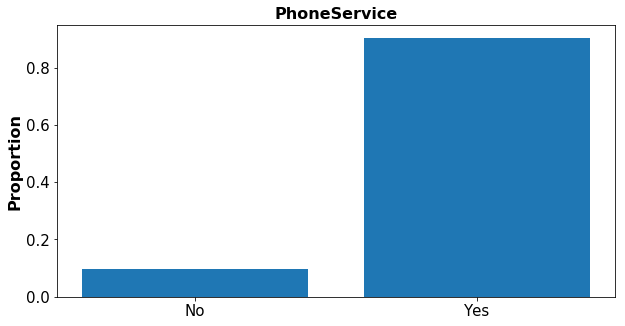

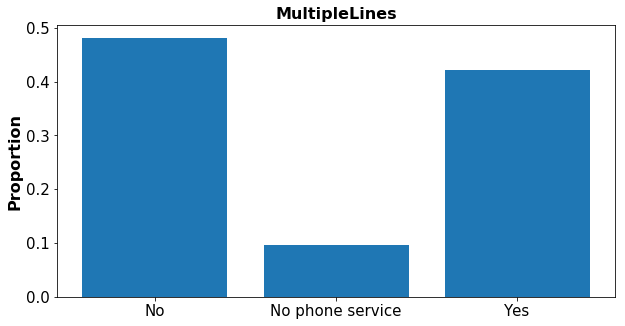

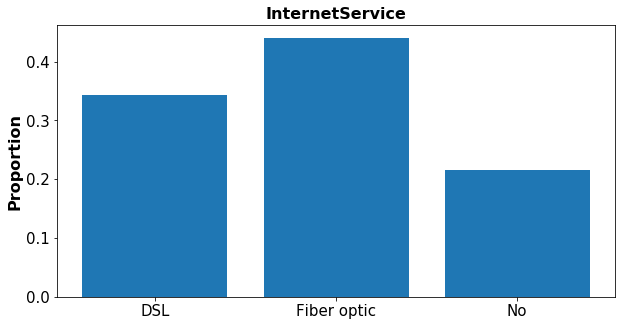

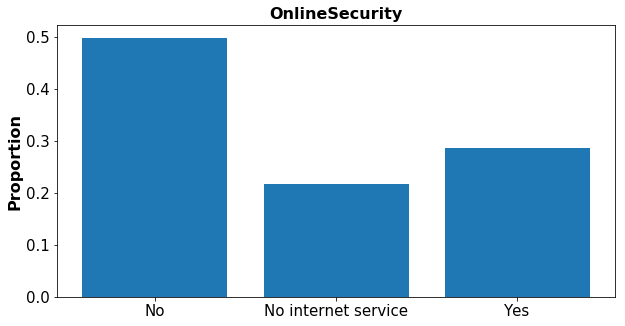

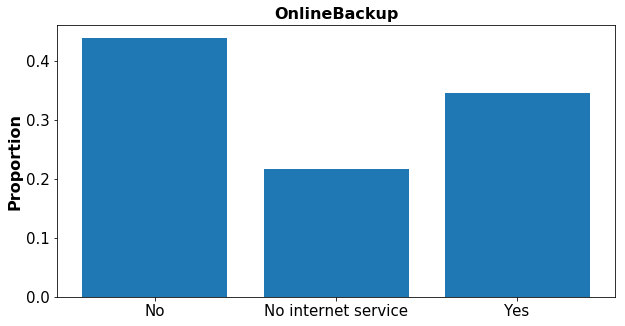

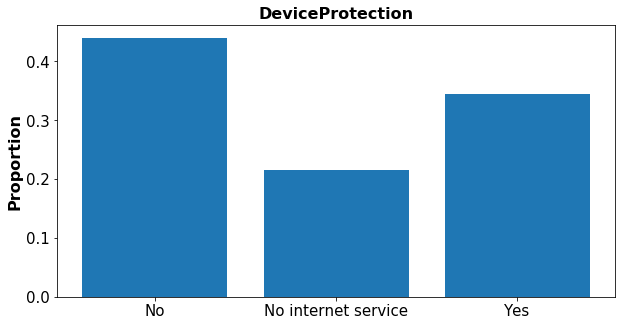

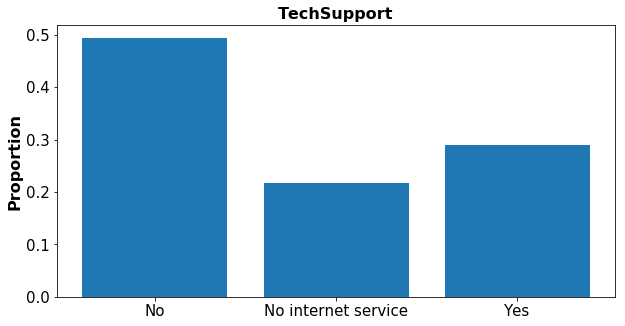

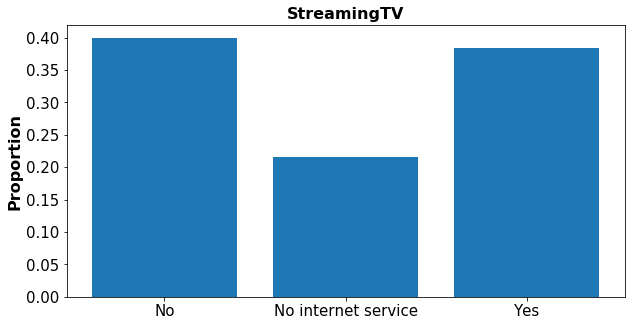

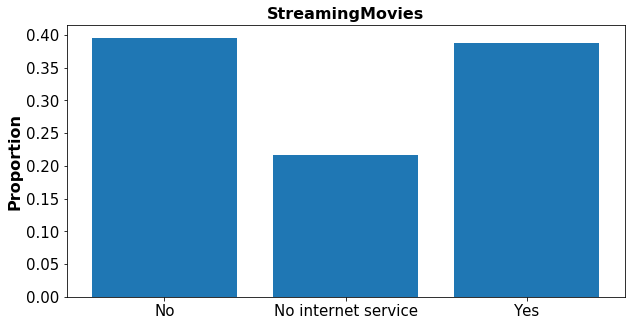

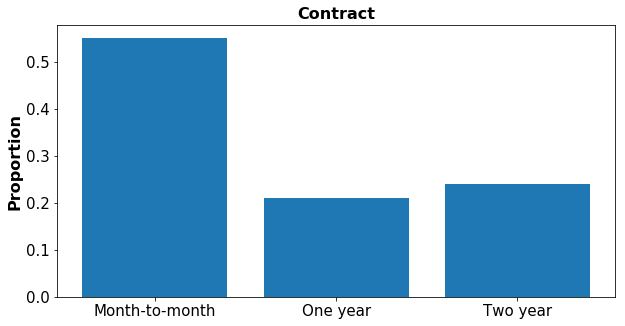

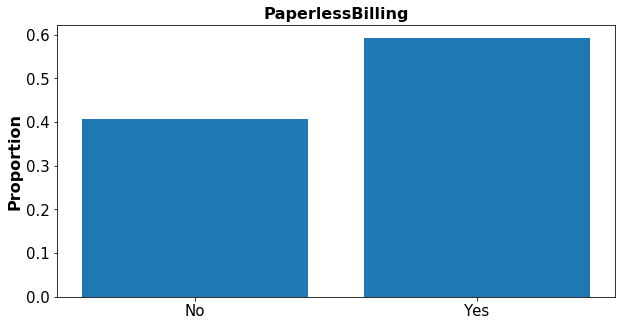

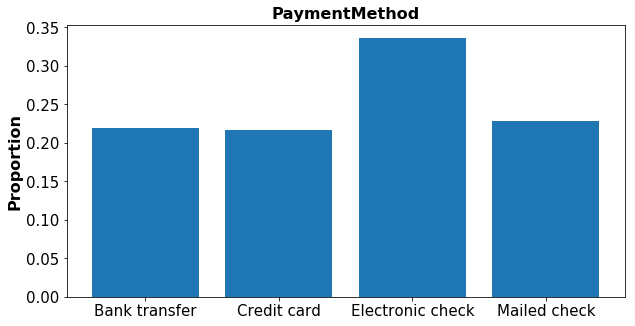

In [9]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

for column in data.drop(columns = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']).columns:
    
    pdata = pd.DataFrame(data.groupby(by = [column]).count().Churn/data.shape[0])

    pdata = pdata.rename(columns= {'Churn': 'Proportion'})
    
    if(column == 'SeniorCitizen'):
        pdata = pdata.set_index([['No', 'Yes']])
        
    fig, ax = plt.subplots(figsize=(10,5))
    plt.bar(pdata.index.values, pdata['Proportion'])
    plt.title(column, fontdict=font)
    plt.ylabel('Proportion', fontdict=font)
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    plt.show()

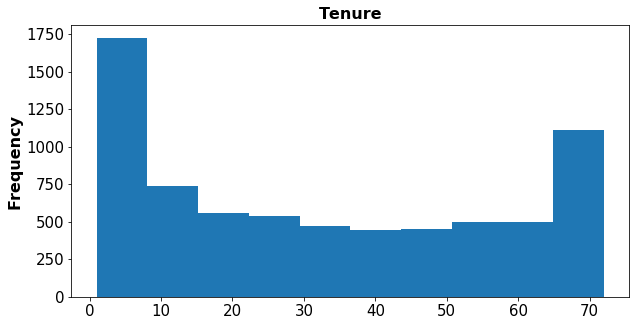

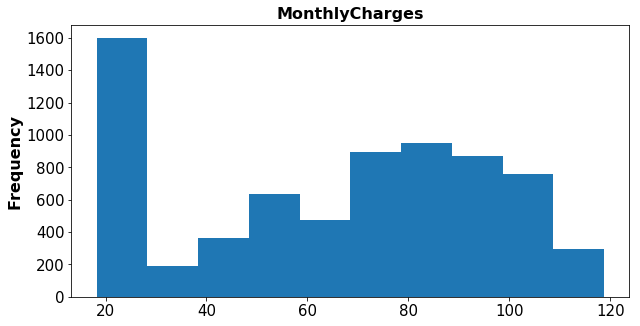

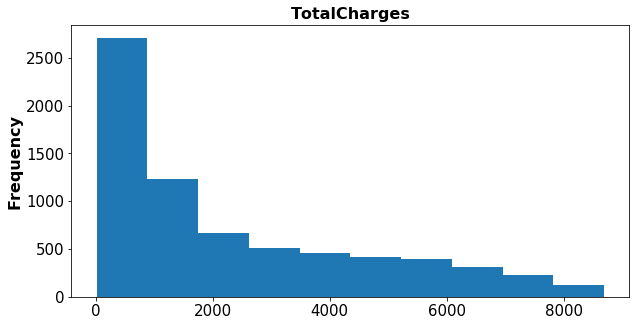

In [10]:
columns = ['Tenure', 'MonthlyCharges', 'TotalCharges']

for column in columns:
    fig, ax = plt.subplots(figsize=(10,5))
    plt.hist(data[column])
    plt.title(column, fontdict=font)
    plt.ylabel('Frequency', fontdict=font)
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    plt.show()

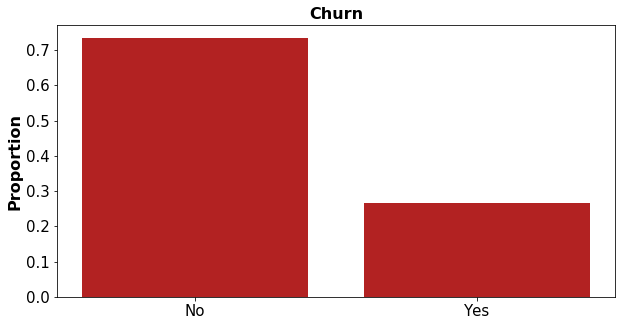

In [11]:
pdata = pd.DataFrame(data.groupby(by = ['Churn']).count().Gender/data.shape[0])

pdata = pdata.rename(columns= {'Gender': 'Proportion'})

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pdata.index.values, pdata['Proportion'], color='firebrick')
plt.title('Churn', fontdict=font)
plt.ylabel('Proportion', fontdict=font)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.show()

## Preprocessing:

In [12]:
df = data.copy()

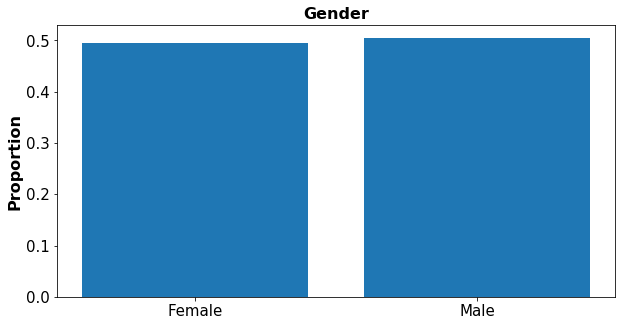

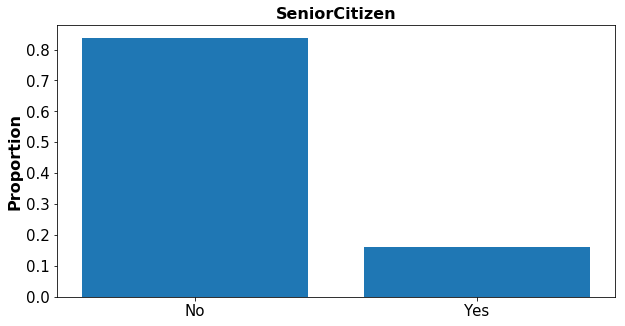

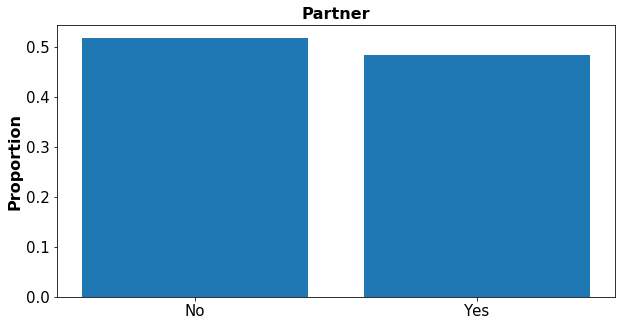

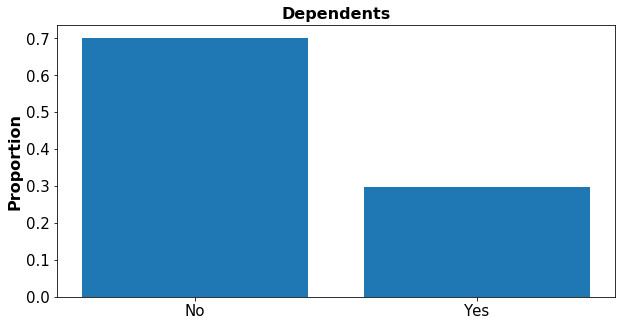

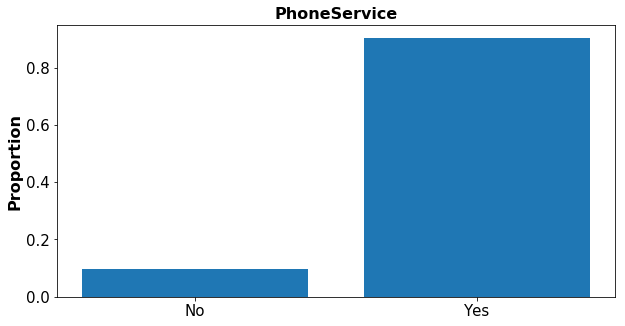

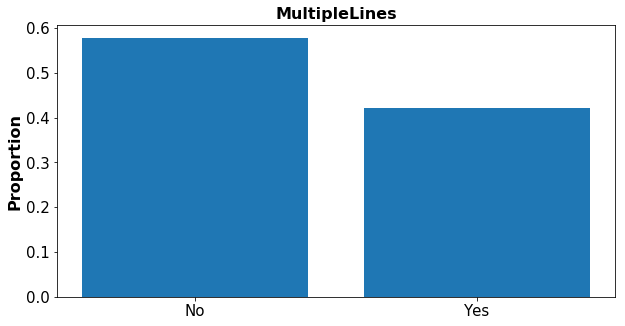

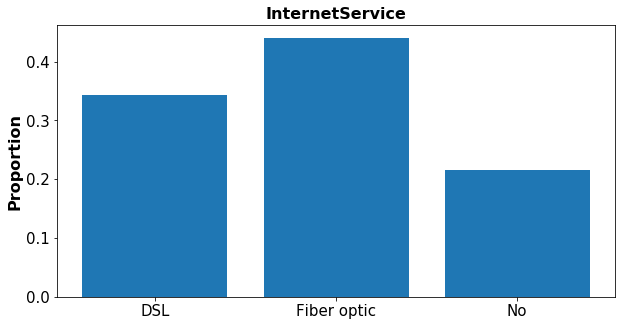

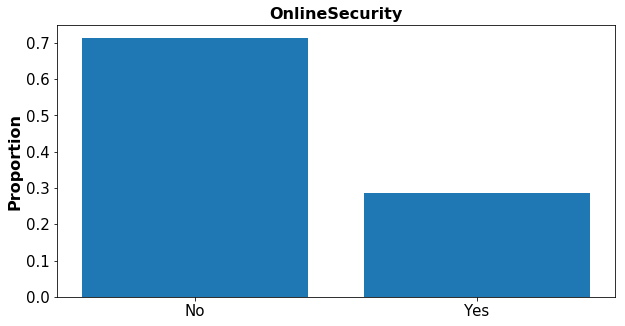

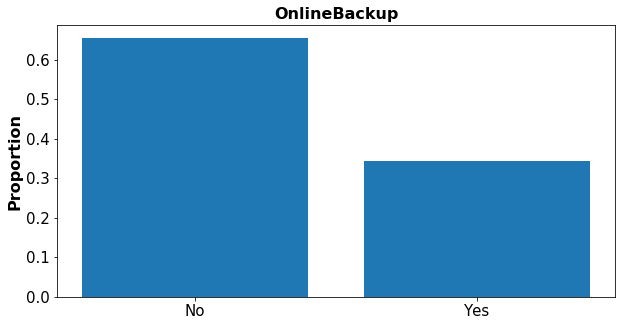

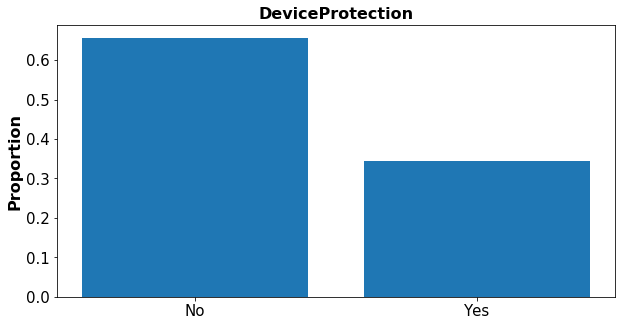

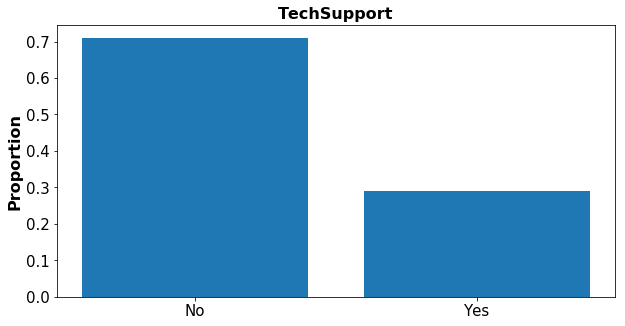

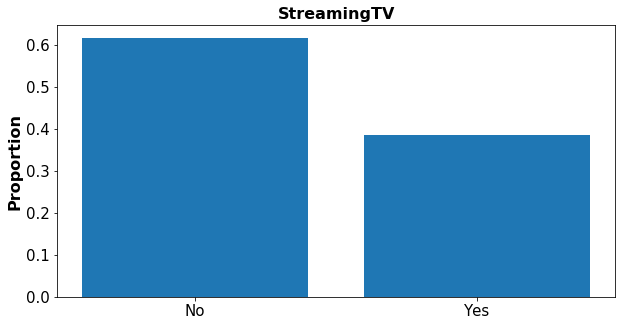

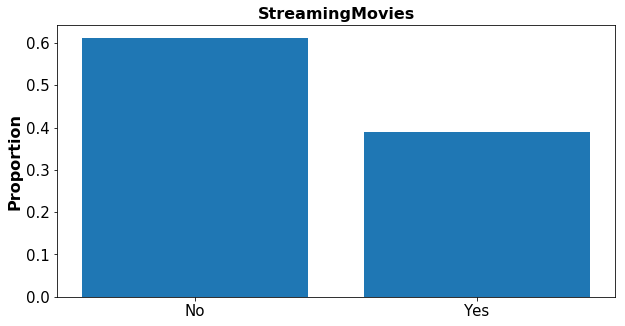

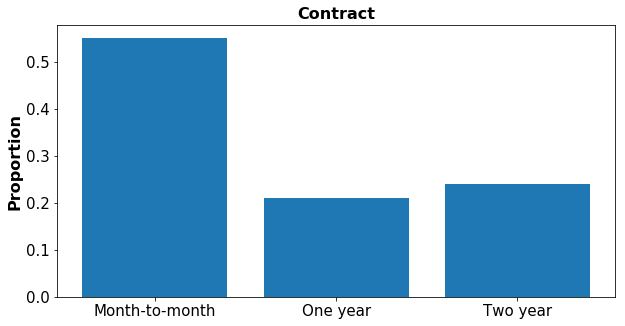

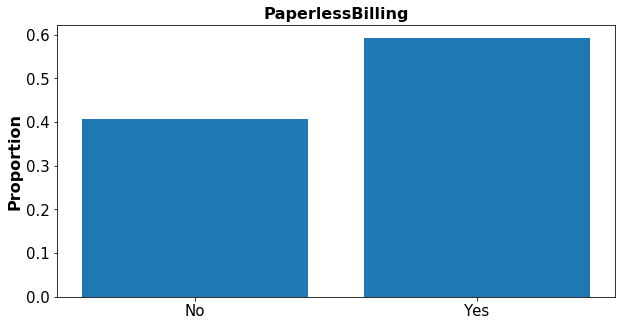

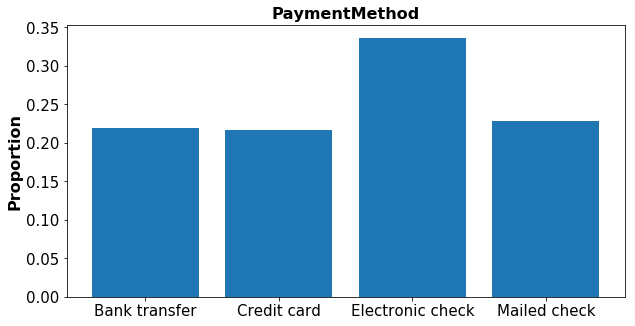

In [13]:
#We already know if the customer has phone service or internet service from the PhoneService and InternetService columns.
#Therefore, for the columns about specific phone/internet services, it is simpler to just make them a yes/no binary variable, 
#and no information is lost.

df = df.replace({'No phone service': 'No', 'No internet service': 'No'})

for column in df.drop(columns = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']).columns:
    
    pdata = pd.DataFrame(df.groupby(by = [column]).count().Churn/data.shape[0])

    pdata = pdata.rename(columns= {'Churn': 'Proportion'})
    
    if(column == 'SeniorCitizen'):
        pdata = pdata.set_index([['No', 'Yes']])
        
    fig, ax = plt.subplots(figsize=(10,5))
    plt.bar(pdata.index.values, pdata['Proportion'])
    plt.title(column, fontdict=font)
    plt.ylabel('Proportion', fontdict=font)
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    plt.show()

In [14]:
#We convert the Gender column into a numeric binary column (0 for Female, 1 for Male) in order to use it in the modelling process.

m = {'Female': 0, 'Male': 1}

df.Gender = df.Gender.map(m)

display(df.Gender.mean())

df.head()

0.5046928327645052

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
#We convert these columns into numeric binary columns (0 for No, 1 for Yes) in order to use them in the modelling process.

columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

m = {'No': 0, 'Yes': 1}

for column in columns:

    df[column] = df[column].map(m)

df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer,42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [16]:
#For the non-binary categorical columns, we use one hot encoding to turn each possible answer into a separate binary boolean
#column that indicates whether that answer was selected (1) or not (0). These columns can then be used in the modelling process. 

dfoh = pd.get_dummies(df[['InternetService', 'Contract', 'PaymentMethod']])

display(dfoh.head())

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0,0,1,0


In [17]:
#We add the columns generated above onto the dataframe, and drop the non-binary categorical columns from which they were created.

df = df.merge(dfoh, left_index=True, right_index=True)

df = df.drop(columns = ['InternetService', 'Contract', 'PaymentMethod'])
display(df.head())

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


## Feature Selection:

In [18]:
#We perform a Chi Squared test on all of the categorical variables, as compared to the target categorical variable (Churn), in
#order to ascertain which of them are least likely to vary independently of the target variable. Higher scores indicate a 
#lower chance of varying independently with the target.

from sklearn.feature_selection import chi2

X = df.drop(columns = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])
y = df['Churn']

chi_scores = pd.DataFrame(chi2(X, y)[0], columns = ['ChiScore'])
chi_scores = chi_scores.set_index(X.columns)
display(chi_scores.sort_values(by = 'ChiScore', ascending = False))

,ChiScore
Contract_Month-to-month,516.714004
Contract_Two year,486.223101
PaymentMethod_Electronic check,424.113152
InternetService_Fiber optic,372.082851
InternetService_No,285.475152
Contract_One year,176.608724
OnlineSecurity,147.165601
TechSupport,135.439602
SeniorCitizen,133.482766
Dependents,131.271509


In [19]:
#We calculate the Pearson Correlation Coefficients of all non-target variables with the target variable in order to see which
#ones are the most correlated with the target, and what the direction of this correlation is (positive or negative).

coefs = pd.DataFrame(df.corr()['Churn'])
coefs = coefs.rename(columns = {'Churn': 'Correlation Coefficients'})
coefs['Importance'] = abs(coefs['Correlation Coefficients'])

coefs = coefs.drop(['Churn'])

def color_sign(val):
    color = 'red' if val < 0 else 'blue'
    return 'color: %s' % color

display(coefs.sort_values(by = 'Importance', ascending = False).drop(columns = ['Importance']).style.applymap(color_sign))

,Correlation Coefficients
Contract_Month-to-month,0.404565
Tenure,-0.354049
InternetService_Fiber optic,0.307463
Contract_Two year,-0.301552
PaymentMethod_Electronic check,0.301455
InternetService_No,-0.227578
TotalCharges,-0.199484
MonthlyCharges,0.192858
PaperlessBilling,0.191454
Contract_One year,-0.178225


### Feature selection criteria: Chi Squared Score greater than 100 (for categorical), correlation coefficient with an absolute value greater than 0.15, feature set should not include all columns in a one hot encoded feature (to avoid collinearity and information duplication). TotalCharges excluded because it's highly related to Tenure and MonthlyCharges, which were included.


## Modelling:

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['Contract_Month-to-month', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'MonthlyCharges', 'PaperlessBilling',
            'SeniorCitizen', 'Tenure', 'Contract_Two year', 'InternetService_No', 'OnlineSecurity', 'TechSupport', 'Dependents']

target = 'Churn'

X = df[features]
y = df[target]

#We split the data for training and testing purposes, 60% for training, 40% for testing. We use stratification so that the
#proportion of Yes-Churns and No-Churns are the same in the training and testing sets as they are in the full dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)

#We scale the data so that the units for the binary categorical variables and the units for the continuous variables are
#comparable, which in turn makes the strength of our model coefficients comparable.

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
#We calculate the base accuracy rate by creating a model which just predicts that no customer churned, as this is the more
#frequent outcome. We calculate the effectiveness of our model by comparing it against this base rate. 

from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy = 'most_frequent')
model.fit(X_train, y_train)

print('The base accuracy rate is:')
print(model.score(X_test, y_test))

The base accuracy rate is:
0.7340917170280838


### We create our model as a Logistic Regression. We chose this model because it produces interpretable model coefficients, and because more complex classification models (such as Gradient Boosting and Support Vector Machine) did not achieve appreciably higher scores. We left the regularization strength as the default (C = 1), because setting it either higher or lower made the accuracy worse. The model creation code is commented out because, once we used it to create a good model, we exported that model to a pkl file, and are now just loading that model and then scoring with it.

In [22]:
from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(solver = 'lbfgs')
# model.fit(X_train, y_train)

from sklearn.externals import joblib
model = joblib.load('Telcom_Logit_Model.pkl')

print('The model accuracy score is:')
print(model.score(X_test, y_test))

The model accuracy score is:
0.8101670814077497


### The model does achieve a noticeably, though not dramatically, better accuracy score than the base rate. This suggests that, while the information in the dataset can explain some of the difference between churning and non-churning customers, much of the difference can only be explained by other factors not covered in the dataset. That being said, in large businesses, even a small informational advantage can make a significant difference in profitability, so it is still worthwhile to employ the predictive model.

## Interpretation and Conclusions:

In [23]:
coefs = pd.DataFrame(model.coef_.T, columns = ['Model Coefficients'])
coefs = coefs.set_index(X.columns)
coefs['Importance'] = abs(coefs['Model Coefficients'])

display(coefs.sort_values(by = 'Importance', ascending = False).drop(columns = ['Importance']).style.applymap(color_sign))

,Model Coefficients
Tenure,-0.723816
Contract_Two year,-0.385278
InternetService_Fiber optic,0.291013
Contract_Month-to-month,0.291004
InternetService_No,-0.273504
MonthlyCharges,0.269787
OnlineSecurity,-0.22278
TechSupport,-0.207766
PaperlessBilling,0.18402
PaymentMethod_Electronic check,0.162755


### As we can see, longer time with the company, extended contracts, and a lack of internet service all make a customer less likely to churn. On the other hand, short-term contracts, fiber optic internet, and higher monthly charges all make a customer more likely to churn.

### While some of these relationships are common sense, the fact that those who spend more per month and those who have a better internet service (fiber optic) are more likely to churn suggests some problem with the company's competitiveness in the higher-end market. It is also worth noting that those with the Online Security and Tech Support services are less likely to churn, which suggests that devoting more sales and marketing resources to selling these services to customers might help improve customer retention.